### 1. 목표 설정
- 보스턴 집값 데이터를 이용해서 회귀분석을 진행해보자.
- 특성곱을 이용해서 새로운 특성을 만들어보자.
- 규제 모델을 이용해서 모델의 복잡도를 제어해보자.

### 2. 데이터 수집
- csv 파일 불러오기 (보스턴 주택 데이터)

In [1]:
# 필요한 라이브러리 import
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# 데이터 불러오기
boston = pd.read_csv('./data/boston_housing.csv')

In [3]:
boston.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
# 필요없는 Unnamed 컬럼 삭제
boston.drop('Unnamed: 0', axis = 1, inplace = True)

In [5]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


- 결측치 없음 !

**특성정보 확인**
- CRIM : 범죄율
- INDUS : 비소매상업지역의 면적 비율
- NOX : 대기 중 일산화질소의 농도
- RM : 주택당 방의 갯수
- LSTAT : 인구 중 하위 계층의 비율
- B : 인구 중 흑인의 비율
- PIRATIO : 학생 / 교사 비율
- ZN : 25000평방 피트를 초과한 거주지의 비율
- CHAS : 찰스강의 경계에 위치한 경우는 1, 아닌 경우는 0
- AGE : 1940년대 이전에 지어진 주택의 비율
- DIS : 직업센터의 거리
- TAX : 재산세율

**종속변수 확인**
- MEDV : 집 값, 주택 가격

### 3. 데이터 전처리
- 결측치 없었다.
- 보스턴 주택 데이터는 학습용으로 제공된 데이터라 전처리가 필요없다(데이터가 깔끔하다.)

### 4. 탐색적 데이터 분석
- 생략

### 5. 모델링
- 데이터 분리(X_train, X_test, y_train, y_test)
- 모델 선정 및 학습 / 평가 / 예측

In [6]:
# 데이터 분리
# step 1 : 데이터를 분리하기 위한 모듈 불러오기
from sklearn.model_selection import train_test_split

# step 2 : 데이터 분리하기 (y (정답 데이터는 MEDV 컬럼))
# 문제와 정답 분할
X = boston.drop('MEDV', axis = 1)
y = boston.loc[ : , 'MEDV']

# step 3 : 데이터 분할 확인하기
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.3,
                                                   random_state=14)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((354, 13), (152, 13), (354,), (152,))

In [7]:
# 분할된 데이터를 가지고 상관계수 확인하기
X_train.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.198127,0.407642,-0.062908,0.396684,-0.204196,0.342938,-0.370585,0.615835,0.583885,0.287578,-0.455281,0.412497
ZN,-0.198127,1.000000,-0.537779,-0.036186,-0.516228,0.328811,-0.587600,0.667067,-0.321028,-0.302022,-0.412976,0.180559,-0.418373
INDUS,0.407642,-0.537779,1.000000,0.046579,0.750273,-0.422111,0.645569,-0.698460,0.603990,0.701238,0.373049,-0.375440,0.599017
CHAS,-0.062908,-0.036186,0.046579,1.000000,0.079141,0.043520,0.088738,-0.086626,-0.016696,-0.044503,-0.088673,0.041842,-0.037309
NOX,0.396684,-0.516228,0.750273,0.079141,1.000000,-0.324292,0.724184,-0.769434,0.590693,0.642399,0.160945,-0.386455,0.576952
RM,-0.204196,0.328811,-0.422111,0.043520,-0.324292,1.000000,-0.267122,0.224127,-0.231818,-0.310267,-0.366450,0.169576,-0.616330
AGE,0.342938,-0.587600,0.645569,0.088738,0.724184,-0.267122,1.000000,-0.753645,0.457447,0.491449,0.259480,-0.295535,0.607902
DIS,-0.370585,0.667067,-0.698460,-0.086626,-0.769434,0.224127,-0.753645,1.000000,-0.492302,-0.516146,-0.217870,0.311121,-0.474333
RAD,0.615835,-0.321028,0.603990,-0.016696,0.590693,-0.231818,0.457447,-0.492302,1.000000,0.925356,0.471381,-0.438406,0.465708
TAX,0.583885,-0.302022,0.701238,-0.044503,0.642399,-0.310267,0.491449,-0.516146,0.925356,1.000000,0.463844,-0.444427,0.510925


<Axes: >

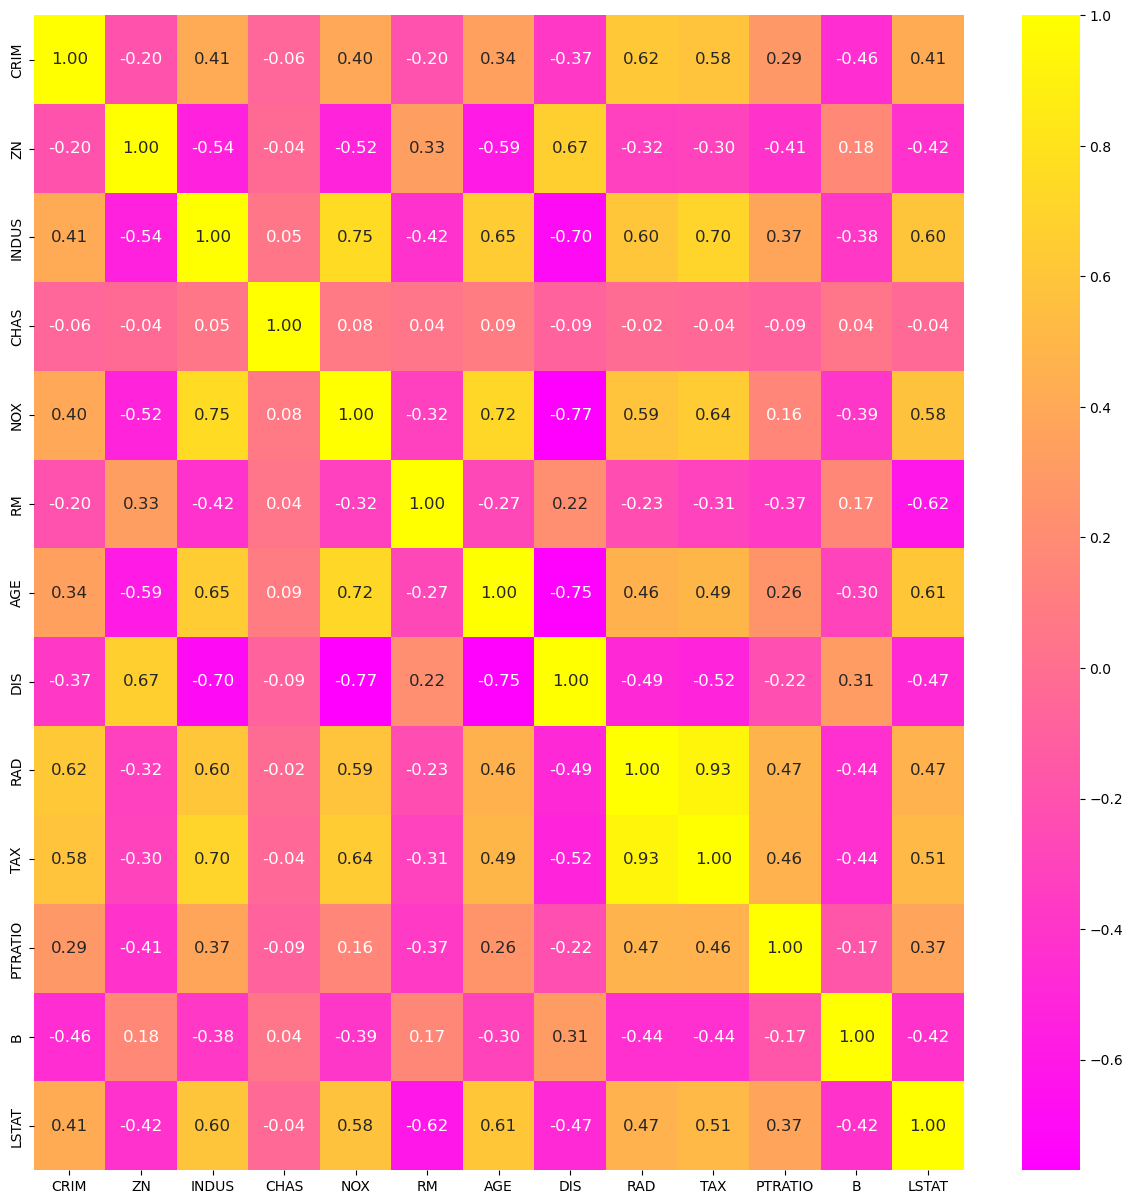

In [8]:
# 상관계수를 히트맵으로 출력
plt.figure(figsize = (15,15))

sns.heatmap(data = X_train.corr(),
            annot = True,             # annot = 히트맵 내부 글씨 출력
            annot_kws = {'size' : 12}, # 내부 글씨의 옵션(글씨의 크기)
            fmt = '.2f',               # 소숫점 자리 출력
            cmap = 'spring'             # 히트맵의 색상
           )

In [9]:
# 선형 회귀 모델 사용하기
# Step.1 : 모델 import
from sklearn.linear_model import LinearRegression

In [10]:
# Step.2 : 모델 객체 생성
linear_model = LinearRegression()

In [11]:
# Step.3 : 모델 학습
linear_model.fit(X_train, y_train)

LinearRegression()

In [12]:
# Step.4 : 교차 검증
from sklearn.model_selection import cross_val_score
result = cross_val_score(linear_model, X_train, y_train, cv = 5)
print(result)
print(result.mean())

[0.82133572 0.69548202 0.76977103 0.60091794 0.72619665]
0.7227406713851028


In [13]:
# 가중치 w값 확인해보기
linear_model.coef_

array([-1.04208858e-01,  5.14224082e-02,  3.26235929e-02,  2.41480725e+00,
       -1.68184518e+01,  4.22091959e+00,  8.71322533e-03, -1.39154760e+00,
        3.19797753e-01, -1.31193609e-02, -9.26304695e-01,  7.14452214e-03,
       -5.59406763e-01])

In [14]:
# 편향 b값 확인해보기
linear_model.intercept_

33.249743960407706

In [15]:
# 정답 예측
pre = linear_model.predict(X_test)
pre

array([17.05285219, 40.99581618, 20.97480235, 24.90789542, 22.2523638 ,
       21.34258336, 12.14768738,  5.00452619, 19.51969562, 16.74523737,
       23.79450368, 19.39133431, 15.51480145, 24.47187154, 22.69350554,
       32.01603536, 35.47632458, 20.07531707, 17.78753886, 27.14530495,
       19.02322935, 32.72037647,  2.70990953, 14.59629453,  8.10394764,
       15.96596613, 17.44608348, 20.36154698, 22.00353754, 26.12055982,
       21.92309287, 26.9730985 , 25.34548012, 23.49130574, 28.63387093,
       33.10613697,  9.65598959, 18.54582012, 16.94447243, 16.3919801 ,
       35.88106625, 25.45732842, 19.43323551, 24.15482115, 16.70714982,
       19.95303288, 25.16690461, 20.44814713, 20.28838392, 13.23707552,
       20.37339756, 15.08557519, 10.3193517 , 26.60043795,  5.23256098,
       14.06537815, 16.71261575, 14.13030307, 22.35648121, -0.74559001,
       19.26817767, 33.94442075, 22.42269172, 33.12653572, 17.87392514,
       25.04760047, 23.18226021, 16.72709117,  5.95329919, 13.67

- 회귀 평가 지표를 이용해서, 모델을 평가해보자.
- MSE, MAE, RMSE, R2스코어

In [16]:
# 평가지표 import
# sklearn.metrics : 평가지표들이 모여있는 곳
from sklearn.metrics import mean_squared_error # 평균 제곱 오차
from sklearn.metrics import mean_absolute_error # 평균 절대 오차
from sklearn.metrics import r2_score # r2 스코어

In [17]:
# MSE 사용하기
mean_squared_error(pre, y_test)

27.22264547868531

In [18]:
# RMSE 사용하기
# sklearn 내부에서는 RMSE를 지원하지 않는다. -> 넘파이에 있는 sqrt 함수 사용
np.sqrt(mean_squared_error(pre, y_test))

5.2175325086371345

In [19]:
# MAE 사용하기
mean_absolute_error(pre, y_test)

3.6564020213095834

In [20]:
# r2 스코어 사용하기
r2_score(pre, y_test)

0.5857060476116772

In [21]:
# score 함수 사용해보기
linear_model.score(X_test, y_test)

0.6575515330273629

- 현재 회귀모델은 성능이 그렇게 좋은 편이 아닌 것 같다.
- 일반적으로 선형회귀모델은 데이터의 특성이 많을 수록 성능이 좋아진다.
- 특성이 적은 경우 선형회귀 모델이 간단해진다.(단순해진다) -> 성능이 낮아질 수 밖에 없다.
- 모델을 제어할 수 있는 하이퍼 파라미터 조정이 불가능하기 때문이다.
- 특성 곱을 이용해서 새로운 특성을 만들어보자.

**원본 데이터 프레임 복사하기**

In [22]:
# copy() : 데이터 프레임의 현재 상태를 복사 / 복사 당시의 데이터 프레임 상태만 복사하는 깊은 복사
X_train_copy = X_train.copy()

In [23]:
# 기존의 훈련용 문제 데이터에 훈련용 정답 컬럼을 추가해주자
# 정답을 포함한 상관관계를 파악하기 위해서 ! 정답 컬럼을 추가 !
X_train_copy['MEDV'] = y_train

In [24]:
# 데이터프레임 형태 바꼈다 -> shape, info
X_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 31 to 107
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     354 non-null    float64
 1   ZN       354 non-null    float64
 2   INDUS    354 non-null    float64
 3   CHAS     354 non-null    float64
 4   NOX      354 non-null    float64
 5   RM       354 non-null    float64
 6   AGE      354 non-null    float64
 7   DIS      354 non-null    float64
 8   RAD      354 non-null    float64
 9   TAX      354 non-null    float64
 10  PTRATIO  354 non-null    float64
 11  B        354 non-null    float64
 12  LSTAT    354 non-null    float64
 13  MEDV     354 non-null    float64
dtypes: float64(14)
memory usage: 41.5 KB


In [25]:
# 훈련데이터 상관관계 확인하기
X_train_copy.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.198127,0.407642,-0.062908,0.396684,-0.204196,0.342938,-0.370585,0.615835,0.583885,0.287578,-0.455281,0.412497,-0.365201
ZN,-0.198127,1.000000,-0.537779,-0.036186,-0.516228,0.328811,-0.587600,0.667067,-0.321028,-0.302022,-0.412976,0.180559,-0.418373,0.384899
INDUS,0.407642,-0.537779,1.000000,0.046579,0.750273,-0.422111,0.645569,-0.698460,0.603990,0.701238,0.373049,-0.375440,0.599017,-0.489072
CHAS,-0.062908,-0.036186,0.046579,1.000000,0.079141,0.043520,0.088738,-0.086626,-0.016696,-0.044503,-0.088673,0.041842,-0.037309,0.138453
NOX,0.396684,-0.516228,0.750273,0.079141,1.000000,-0.324292,0.724184,-0.769434,0.590693,0.642399,0.160945,-0.386455,0.576952,-0.419515
RM,-0.204196,0.328811,-0.422111,0.043520,-0.324292,1.000000,-0.267122,0.224127,-0.231818,-0.310267,-0.366450,0.169576,-0.616330,0.726667
AGE,0.342938,-0.587600,0.645569,0.088738,0.724184,-0.267122,1.000000,-0.753645,0.457447,0.491449,0.259480,-0.295535,0.607902,-0.380091
DIS,-0.370585,0.667067,-0.698460,-0.086626,-0.769434,0.224127,-0.753645,1.000000,-0.492302,-0.516146,-0.217870,0.311121,-0.474333,0.248849
RAD,0.615835,-0.321028,0.603990,-0.016696,0.590693,-0.231818,0.457447,-0.492302,1.000000,0.925356,0.471381,-0.438406,0.465708,-0.373630
TAX,0.583885,-0.302022,0.701238,-0.044503,0.642399,-0.310267,0.491449,-0.516146,0.925356,1.000000,0.463844,-0.444427,0.510925,-0.452758


- 현재 MEDV 컬럼의 상관관계가 뒤죽박죽 섞여있다. 정리를 해서 확인해보자.

In [26]:
# 내부의 상관 계수 값을 절대값으로 변경
X_train_abs = X_train_copy.corr().abs()
# 절대값으로 변경된 상관 계수를 내림차순으로 정렬해보자 (기준은 MEDV 사용)
X_train_abs.sort_values(by = 'MEDV', ascending = False)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
MEDV,0.365201,0.384899,0.489072,0.138453,0.419515,0.726667,0.380091,0.248849,0.373630,0.452758,0.515816,0.348484,0.751597,1.000000
LSTAT,0.412497,0.418373,0.599017,0.037309,0.576952,0.616330,0.607902,0.474333,0.465708,0.510925,0.367573,0.415306,1.000000,0.751597
RM,0.204196,0.328811,0.422111,0.043520,0.324292,1.000000,0.267122,0.224127,0.231818,0.310267,0.366450,0.169576,0.616330,0.726667
PTRATIO,0.287578,0.412976,0.373049,0.088673,0.160945,0.366450,0.259480,0.217870,0.471381,0.463844,1.000000,0.171175,0.367573,0.515816
INDUS,0.407642,0.537779,1.000000,0.046579,0.750273,0.422111,0.645569,0.698460,0.603990,0.701238,0.373049,0.375440,0.599017,0.489072
TAX,0.583885,0.302022,0.701238,0.044503,0.642399,0.310267,0.491449,0.516146,0.925356,1.000000,0.463844,0.444427,0.510925,0.452758
NOX,0.396684,0.516228,0.750273,0.079141,1.000000,0.324292,0.724184,0.769434,0.590693,0.642399,0.160945,0.386455,0.576952,0.419515
ZN,0.198127,1.000000,0.537779,0.036186,0.516228,0.328811,0.587600,0.667067,0.321028,0.302022,0.412976,0.180559,0.418373,0.384899
AGE,0.342938,0.587600,0.645569,0.088738,0.724184,0.267122,1.000000,0.753645,0.457447,0.491449,0.259480,0.295535,0.607902,0.380091
RAD,0.615835,0.321028,0.603990,0.016696,0.590693,0.231818,0.457447,0.492302,1.000000,0.925356,0.471381,0.438406,0.465708,0.373630


- 상관관계의 범위는 -1 ~ 1
- 현재 절대값으로 변경된 상관계수를 확인 -> 같은 컬럼을 제외한 상관계수가 높은 컬럼 2개를 찾아보자.
- LSTAT와 RM이라는 컬럼이 상관계수가 높았다. -> 이 두가지의 컬럼을 가지고 특성 곱이라는 확장을 진행해보자.

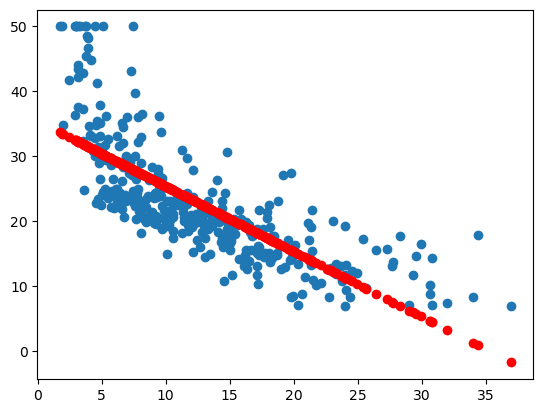

In [27]:
# 상관관계가 높은 데이터를 가지고 특성 확장해보기
# 확장 전) 먼저 LSTAT 특성만 가지고 학습 시킨 후 예측을 어떻게 하는지 시각화

# 모델 학습 -> LSTAT만 가지고 학습
model = LinearRegression()
model.fit(X_train[['LSTAT']], y_train)
pre = model.predict(X_train[['LSTAT']])

# 차트 그려보기 -> 스캐터 차트 두개 그려보기 (실제 데이터, 예측 데이터)
plt.scatter(X_train['LSTAT'], y_train) # -> 실제 데이터 스캐터 차트
plt.scatter(X_train['LSTAT'], pre, color = 'red') # -> 예측 데이터 스캐터 차트
plt.show()

- LSTAT으로만 예측한 데이터는 직선의 형태를 띄고있다.
- 확장 후의 데이터를 확인해보자.

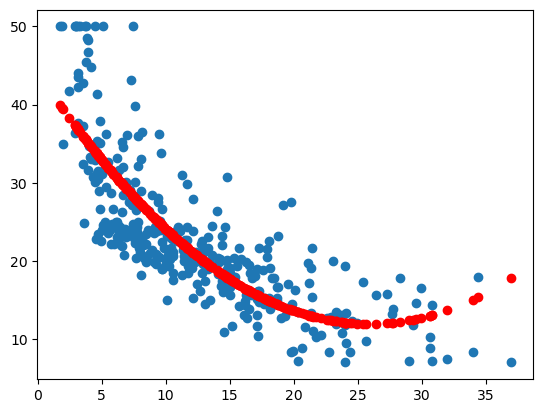

In [28]:
# 특성 확장 후 : 본래 LSTAT 특성과 확장 LSTAT 특성을 가지고 학습시킨 후 예측을 어떻게 하는지 보자
X_train['LSTAT x LSTAT'] = X_train['LSTAT'] * X_train['LSTAT'] # 특성이 추가, 확장됨
# 모델 학습
model2 = LinearRegression()
model2.fit(X_train[['LSTAT', 'LSTAT x LSTAT']], y_train)
pre = model2.predict(X_train[['LSTAT', 'LSTAT x LSTAT']])

# 차트 그려보기 -> 스캐터 차트 두개 그려보기 (실제 데이터, 예측 데이터)
plt.scatter(X_train['LSTAT'], y_train) # -> 실제 데이터 스캐터 차트
plt.scatter(X_train['LSTAT'], pre, color = 'red') # -> 예측 데이터 스캐터 차트
plt.show()

- 직선의 형태가 아니네? -> 곡선이면 비선형인가?
- 다항 회귀의 이해가 필요하다
- 다항회귀 : 독립변수의 단항식이 아닌 (독립변수 X가 1개가 아닌) 2차, 3차 방정식과 같은 다항식으로 표현된 것이 다항 회귀라고 함.

<font color = 'red'> 주의 <br>
    1. 다항 회귀를 선형이 아닌 비선형으로 혼동할 수 있다. -> 선형회귀라는 것을 기억하자. <br>
    2. 선형/비선형 회귀를 나누는 기준 ? -> 가중치 (회귀 계수, w)가 선형 / 비선형인지를 확인해보자. <br>
    3. 독립변수 (문제 데이터, 특성, X)가 선형 / 비선형인지를 따르지 않는다.
</font>

In [29]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 31 to 107
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CRIM           354 non-null    float64
 1   ZN             354 non-null    float64
 2   INDUS          354 non-null    float64
 3   CHAS           354 non-null    float64
 4   NOX            354 non-null    float64
 5   RM             354 non-null    float64
 6   AGE            354 non-null    float64
 7   DIS            354 non-null    float64
 8   RAD            354 non-null    float64
 9   TAX            354 non-null    float64
 10  PTRATIO        354 non-null    float64
 11  B              354 non-null    float64
 12  LSTAT          354 non-null    float64
 13  LSTAT x LSTAT  354 non-null    float64
dtypes: float64(14)
memory usage: 41.5 KB


In [30]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 355 to 243
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     152 non-null    float64
 1   ZN       152 non-null    float64
 2   INDUS    152 non-null    float64
 3   CHAS     152 non-null    float64
 4   NOX      152 non-null    float64
 5   RM       152 non-null    float64
 6   AGE      152 non-null    float64
 7   DIS      152 non-null    float64
 8   RAD      152 non-null    float64
 9   TAX      152 non-null    float64
 10  PTRATIO  152 non-null    float64
 11  B        152 non-null    float64
 12  LSTAT    152 non-null    float64
dtypes: float64(13)
memory usage: 16.6 KB


In [31]:
# X_test에도 확장 LSTAT를 추가 시켜줘보자
X_test['LSTAT x LSTAT'] = X_test['LSTAT'] * X_test['LSTAT']

In [32]:
# 모델 객체 생성
model = LinearRegression()

In [33]:
# 모델 학습
model.fit(X_train, y_train) # 이때 X_train에는 확장된 LSTAT 컬럼 추가

LinearRegression()

In [34]:
# 모델 평가 - 전 score : 65%
model.score(X_test, y_test)

0.7005973902230885

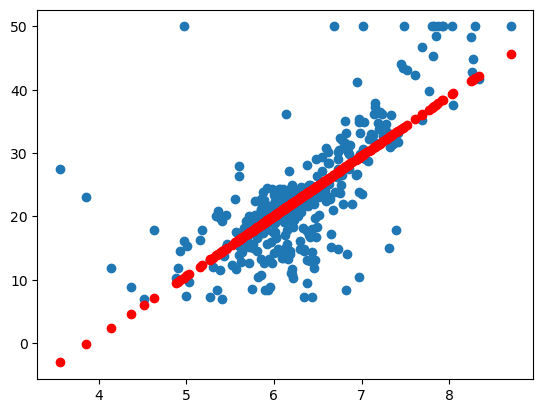

In [35]:
# 특성 확장 하나 더 해보자
# 상관관계가 높았던 RM이라는 컬럼도 특성 확장을 추가

# 상관관계가 높은 데이터를 가지고 특성 확장해보기
# 확장 전) 먼저 RM 특성만 가지고 학습 시킨 후 예측을 어떻게 하는지 시각화

# 모델 학습 -> RM만 가지고 학습
model = LinearRegression()
model.fit(X_train[['RM']], y_train)
pre = model.predict(X_train[['RM']])

# 차트 그려보기 -> 스캐터 차트 두개 그려보기 (실제 데이터, 예측 데이터)
plt.scatter(X_train['RM'], y_train) # -> 실제 데이터 스캐터 차트
plt.scatter(X_train['RM'], pre, color = 'red') # -> 예측 데이터 스캐터 차트
plt.show()

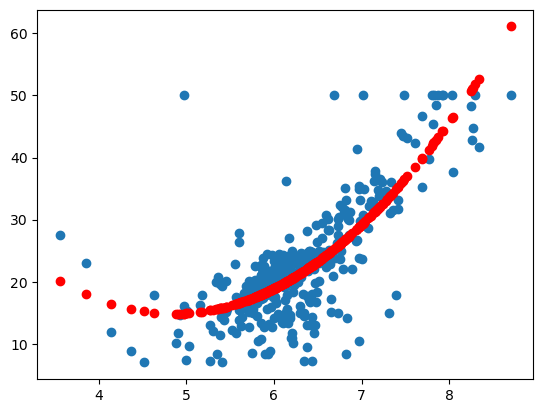

In [36]:
# 특성 확장 후 : 본래 RM 특성과 확장 RM 특성을 가지고 학습시킨 후 예측을 어떻게 하는지 보자
X_train['RM x RM'] = X_train['RM'] * X_train['RM'] # 특성이 추가, 확장됨
# 모델 학습
model2 = LinearRegression()
model2.fit(X_train[['RM', 'RM x RM']], y_train)
pre = model2.predict(X_train[['RM', 'RM x RM']])

# 차트 그려보기 -> 스캐터 차트 두개 그려보기 (실제 데이터, 예측 데이터)
plt.scatter(X_train['RM'], y_train) # -> 실제 데이터 스캐터 차트
plt.scatter(X_train['RM'], pre, color = 'red') # -> 예측 데이터 스캐터 차트
plt.show()

In [37]:
# RM 특성 확장해서 실제 평가까지 진행
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 31 to 107
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CRIM           354 non-null    float64
 1   ZN             354 non-null    float64
 2   INDUS          354 non-null    float64
 3   CHAS           354 non-null    float64
 4   NOX            354 non-null    float64
 5   RM             354 non-null    float64
 6   AGE            354 non-null    float64
 7   DIS            354 non-null    float64
 8   RAD            354 non-null    float64
 9   TAX            354 non-null    float64
 10  PTRATIO        354 non-null    float64
 11  B              354 non-null    float64
 12  LSTAT          354 non-null    float64
 13  LSTAT x LSTAT  354 non-null    float64
 14  RM x RM        354 non-null    float64
dtypes: float64(15)
memory usage: 44.2 KB


In [38]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 355 to 243
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CRIM           152 non-null    float64
 1   ZN             152 non-null    float64
 2   INDUS          152 non-null    float64
 3   CHAS           152 non-null    float64
 4   NOX            152 non-null    float64
 5   RM             152 non-null    float64
 6   AGE            152 non-null    float64
 7   DIS            152 non-null    float64
 8   RAD            152 non-null    float64
 9   TAX            152 non-null    float64
 10  PTRATIO        152 non-null    float64
 11  B              152 non-null    float64
 12  LSTAT          152 non-null    float64
 13  LSTAT x LSTAT  152 non-null    float64
dtypes: float64(14)
memory usage: 17.8 KB


In [39]:
# X_test에도 확장 RM를 추가 시켜줘보자
X_test['RM x RM'] = X_test['RM'] * X_test['RM']

In [40]:
# 모델 객체 생성
model = LinearRegression()

In [41]:
# 모델 학습
model.fit(X_train, y_train) # 추가된 컬럼은 확장 LSTAT, 확장 RM

LinearRegression()

In [42]:
# 모델 평가
model.score(X_test, y_test) # 추가된 컬럼은 확장 LSTAT, 확장 RM

0.6853313403022987

- 정리
    - 특성확장을 진행해서 선형회귀 모델의 성능이 개선된 것을 확인했다.
    - 기존에는 LSTAT와 RM이라는 컬럼만 특성확장을 진행
    - 전체 컬럼을 가지고 특성 확장을 진행하면 성능이 좋아지지 않을까? (가설)

In [43]:
# 전체 컬럼을 가지고 특성 확장 진행해보기
# 1. 기존에 특성이 확장된 컬럼을 삭제
X_train.drop(['LSTAT x LSTAT', 'RM x RM'], axis = 1, inplace = True)
X_test.drop(['LSTAT x LSTAT', 'RM x RM'], axis = 1, inplace = True)

In [44]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 31 to 107
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     354 non-null    float64
 1   ZN       354 non-null    float64
 2   INDUS    354 non-null    float64
 3   CHAS     354 non-null    float64
 4   NOX      354 non-null    float64
 5   RM       354 non-null    float64
 6   AGE      354 non-null    float64
 7   DIS      354 non-null    float64
 8   RAD      354 non-null    float64
 9   TAX      354 non-null    float64
 10  PTRATIO  354 non-null    float64
 11  B        354 non-null    float64
 12  LSTAT    354 non-null    float64
dtypes: float64(13)
memory usage: 38.7 KB


In [45]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 355 to 243
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     152 non-null    float64
 1   ZN       152 non-null    float64
 2   INDUS    152 non-null    float64
 3   CHAS     152 non-null    float64
 4   NOX      152 non-null    float64
 5   RM       152 non-null    float64
 6   AGE      152 non-null    float64
 7   DIS      152 non-null    float64
 8   RAD      152 non-null    float64
 9   TAX      152 non-null    float64
 10  PTRATIO  152 non-null    float64
 11  B        152 non-null    float64
 12  LSTAT    152 non-null    float64
dtypes: float64(13)
memory usage: 16.6 KB


In [46]:
# X_train의 컬럼은 13개 -> 모든 컬럼을 확장
# 원본 확보
X_train_copy2 = X_train.copy()

In [47]:
import warnings
warnings.filterwarnings('ignore')

In [48]:
# 반복문 작성
for col1 in X_train.columns : # 13번 반복 -> 컬럼의 갯수만큼
    for col2 in X_train.columns : # 13번 반복 -> 컬럼의 갯수만큼
        X_train_copy2[col1 + 'x' + col2] = X_train[col1] * X_train[col2]

In [49]:
X_train_copy2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 31 to 107
Columns: 182 entries, CRIM to LSTATxLSTAT
dtypes: float64(182)
memory usage: 506.1 KB


In [50]:
# test에서 진행된 전처리 / 데이터 변경 -> test에서도 진행한다.
# 원본 확보
X_test_copy2 = X_test.copy()
# 반복문 작성
for col1 in X_test.columns : # 13번 반복 -> 컬럼의 갯수만큼
    for col2 in X_test.columns : # 13번 반복 -> 컬럼의 갯수만큼
        X_test_copy2[col1 + 'x' + col2] = X_test[col1] * X_test[col2]

In [51]:
X_test_copy2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 355 to 243
Columns: 182 entries, CRIM to LSTATxLSTAT
dtypes: float64(182)
memory usage: 217.3 KB


In [52]:
# 모델 객체 생성
model = LinearRegression()

In [53]:
# 모델 학습
model.fit(X_train_copy2, y_train)

LinearRegression()

In [54]:
# 모델 평가 -> 성능이 높아졌다.
model.score(X_test_copy2, y_test)

0.8217205550797351

In [55]:
# 과대적합인지 확인을 해보자.
model.score(X_train_copy2, y_train)

0.9452199258630157

- 특성 확장을 진행을 해봤더니 성능 자체는 올라간 것처럼 보인다.
- 하지만 모델 자체가 복잡해져서 과대적합의 모습을 보이고 있다.
- 일반화에는 크게 도움이 된 것 같지 않다.

### 규 제
- 선형회귀에서 모델의 일반화를 위해 과적합 상태를 어떻게 제어할 것인가?

- L1 Lasso 규제 : 가중치에 똑같은 힘으로 규제를 적용하는 방법. 자동으로 특성 선택이 일어남.
- L2 Ridge 규제 : 모든 가중치에 같은 비율로 규제를 적용하는 방법. 0이되는 가중치가 없다. -> 비율이라는 방법으로 규제를 적용하기때문

### Ridge 모델

In [56]:
# 모델 import
from sklearn.linear_model import Ridge

In [57]:
# 모델 객체 생성
# alpha : 규제의 강도를 정해주는 파라미터
# alpha가 높아지면 규제강도가 강해지고, 낮아지면 규제강도가 약화된다.
ridge_model = Ridge(alpha = 100) # 기본값은 1.0

In [58]:
# 모델 학습
ridge_model.fit(X_train_copy2, y_train)

Ridge(alpha=100)

In [59]:
# 모델 평가
ridge_model.score(X_test_copy2, y_test)

0.7769048146690374

In [60]:
# 모델 평가
ridge_model.score(X_train_copy2, y_train)

0.9325182376567254

### Lasso 모델

In [61]:
from sklearn.linear_model import Lasso

In [62]:
# 모델 객체 생성
lasso_model = Lasso(alpha = 100)

In [63]:
# 모델 학습
lasso_model.fit(X_train_copy2, y_train)

Lasso(alpha=100)

In [64]:
# 모델 평가
lasso_model.score(X_test_copy2, y_test)

0.6596761034093479

In [65]:
# 모델 평가
lasso_model.score(X_train_copy2, y_train)

0.8088476476273541

In [66]:
# 반복문을 이용해서 Ridge와 Lasso alpha값을 조절해보고 모델을 비교해보자
# 1. 알파값(규제강도) 리스트 만들어주기
alpha_list = [0.001, 0.01, 0.1, 10, 100, 1000]

# 2. ridge 모델과 lasso 모델 가중치를 기록할 리스트 만들어주기.
ridge_coef_list = []
lasso_coef_list = []

# 3. 반복문 만들기 - 모델 제작 / 학습 / 리스트에 기록
for i in alpha_list :
    r_model = Ridge(alpha = i)
    l_model = Lasso(alpha = i)
    # 모델 학습
    r_model.fit(X_train, y_train)
    l_model.fit(X_train, y_train)
    # 가중치 확인 후 리스트에 넣기
    ridge_coef_list.append(r_model.coef_)
    lasso_coef_list.append(l_model.coef_)

In [67]:
# lasso 정규화 w값 확인해보기
lasso_df = pd.DataFrame(np.array(lasso_coef_list).T,
                       columns = alpha_list,
                       index = X_train.columns)
lasso_df

,0.001,0.010,0.100,10.000,100.000,1000.000
CRIM,-0.104004,-0.102158,-0.093277,-0.000000,-0.000000,-0.0
ZN,0.051492,0.052120,0.055739,0.037418,0.000000,0.0
INDUS,0.031424,0.020634,-0.014192,-0.000000,-0.000000,-0.0
CHAS,2.395889,2.225616,0.639270,0.000000,0.000000,0.0
NOX,-16.490827,-13.542272,-0.000000,0.000000,-0.000000,-0.0
RM,4.220702,4.218730,4.063000,0.000000,0.000000,0.0
AGE,0.008512,0.006697,0.001003,0.004739,-0.000000,-0.0
DIS,-1.385741,-1.333477,-1.060640,-0.000000,0.000000,0.0
RAD,0.319430,0.316127,0.309222,0.000000,-0.000000,-0.0
TAX,-0.013170,-0.013622,-0.016416,-0.009128,-0.019873,-0.0


In [68]:
# ridge 정규화 w값 확인해보기
ridge_df = pd.DataFrame(np.array(ridge_coef_list).T,
                       columns = alpha_list,
                       index = X_train.columns)
ridge_df

,0.001,0.010,0.100,10.000,100.000,1000.000
CRIM,-0.104200,-0.104118,-0.103370,-0.096434,-0.096235,-0.081762
ZN,0.051426,0.051454,0.051720,0.056433,0.062866,0.064890
INDUS,0.032569,0.032081,0.027602,-0.023730,-0.041009,-0.037980
CHAS,2.414565,2.412400,2.391768,1.550346,0.399666,0.057674
NOX,-16.803376,-16.668904,-15.433762,-1.684562,-0.176870,-0.008816
RM,4.221016,4.221873,4.229404,3.946966,2.173994,0.469247
AGE,0.008702,0.008599,0.007662,0.000900,0.017885,0.046458
DIS,-1.391297,-1.389064,-1.368550,-1.137713,-1.008909,-0.461861
RAD,0.319779,0.319613,0.318107,0.316749,0.368459,0.330257
TAX,-0.013122,-0.013141,-0.013319,-0.016066,-0.018825,-0.018669


### 최종 정리
- 현재 보스턴 주택 데이터를 선형 회귀 분석 했을 때 규제항을 적용할 시 라쏘 (L1 규제)가 조금 더 유리한 모습을 보이고 있다.